In [772]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [773]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 2)

In [774]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [775]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [776]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [777]:
data["Survived"].sum()

342

- The Age, Cabin and Embarked have null values. I will try to fix them

# How many Survived?

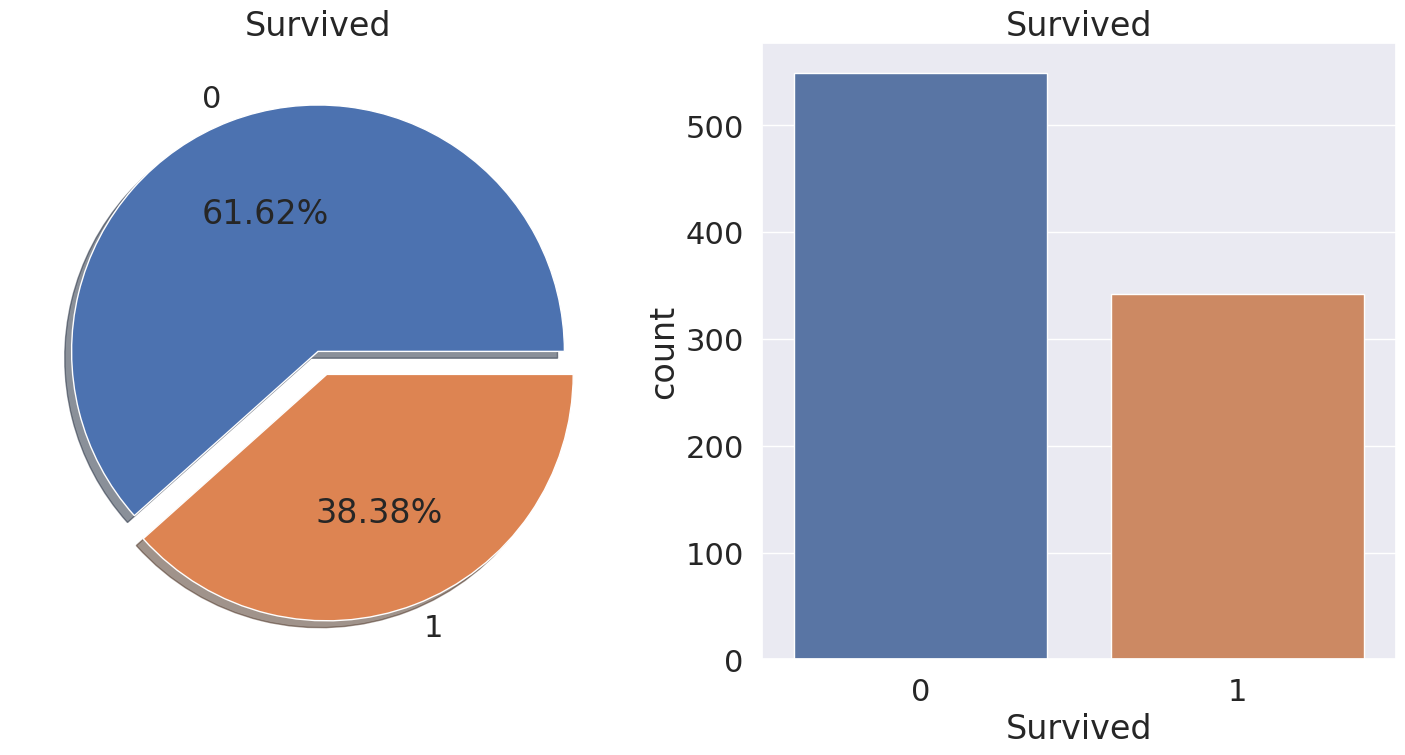

In [778]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x= 'Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()


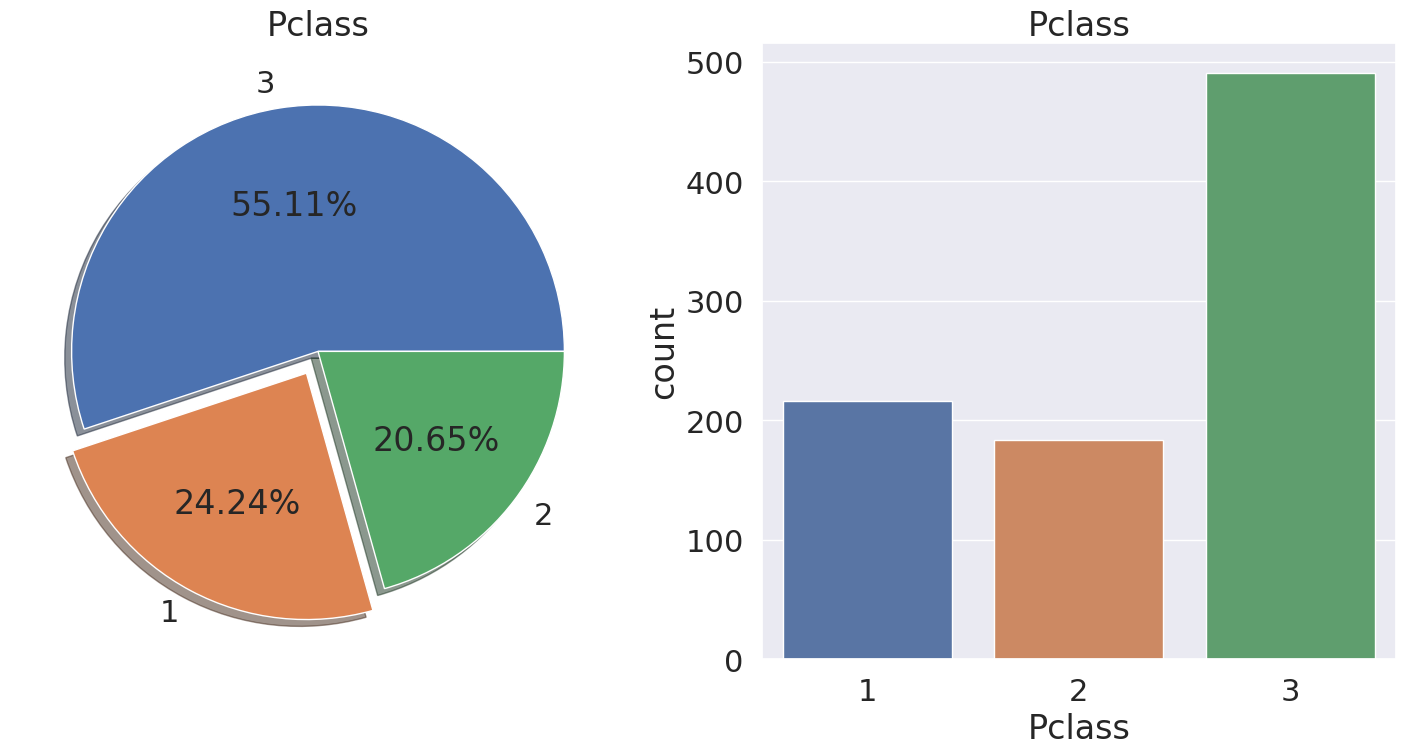

In [779]:

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Replace 'your_dataset' with the actual name of your dataset
data['Pclass'].value_counts().plot.pie(explode=[0.0, 0.1, 0], autopct='%1.2f%%', ax=ax[0], shadow=True)

ax[0].set_title('Pclass')
ax[0].set_ylabel('')
sns.countplot(x='Pclass', data=data, ax=ax[1])
ax[1].set_title('Pclass')

plt.show()


- It is eveident that not many passengers survived the accidents.
- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the apssengers did survive and who didn't

- we will try to check the survival rate  by using the diffrent features of the dataset. 

- Some of the features being Sex, Port Of Embarcation, Age, etc. First let us Understand the different types of features




# Types Of Features

## Categorical features
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables They are also known as **Nominal Variables**

남여

## Ordinal Features:

- An ordinal variable is similar to categorical values.
- but the difference between them is that we can have relative ordering or sorting between the values.
- For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. 
- Here we can hava a relative so rt in the variable

**Ordinal Features in the dataset: Pclass**

## Continous Feature:
- A feature is said to be continous if it can take values between any two points or betwwen the minimum or maximum values in the features column

나이


# Analysing The Feature

## sex --> Categorical Feature

In [780]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

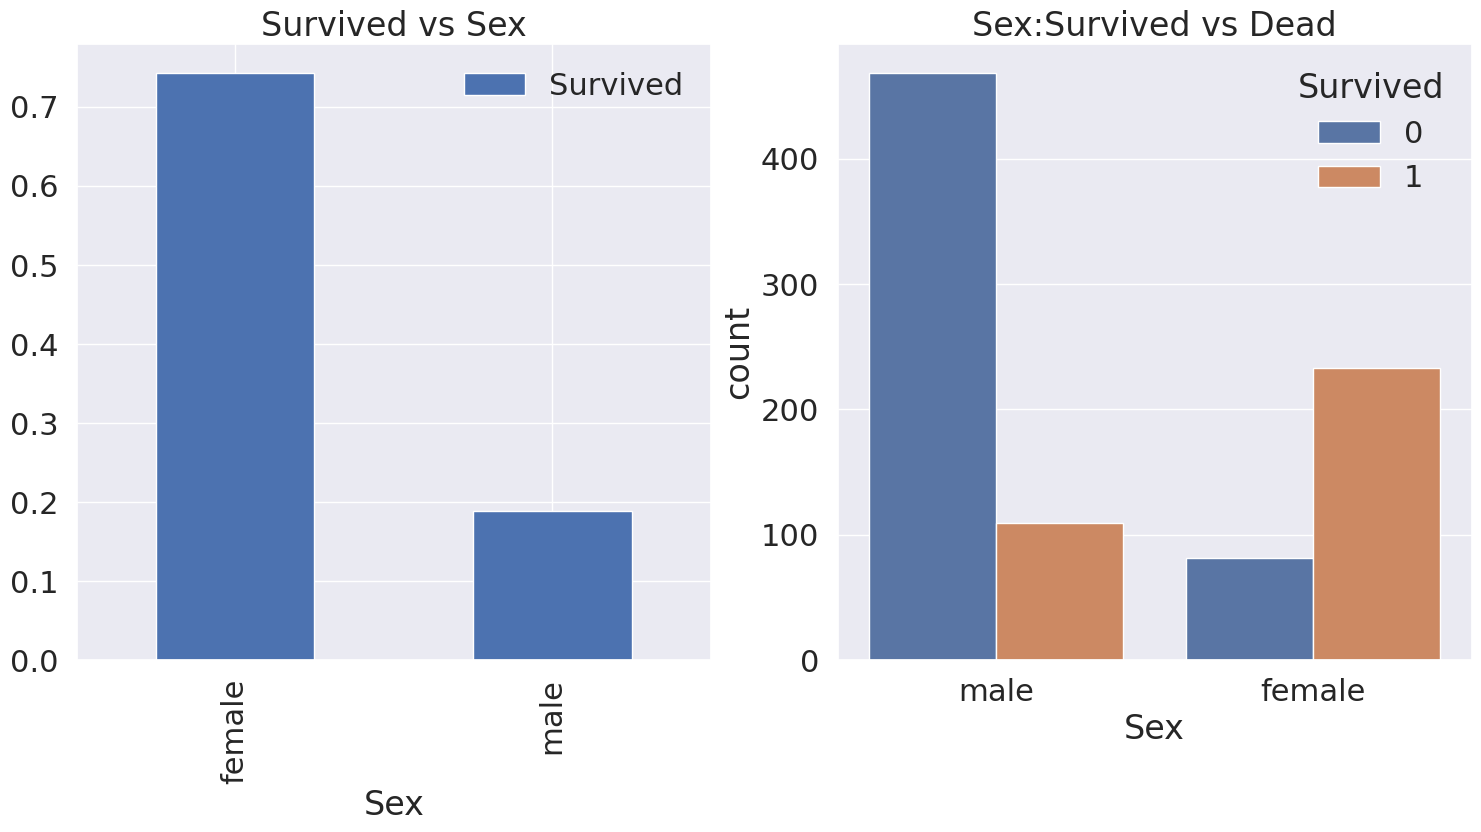

In [781]:
f, ax = plt.subplots(1,2,figsize = (18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- This looks interesting. The number of men on the ship is lot more than the number of women.
- Still the number of women saved is almost twice the number of males saved. - The survival rates for a women on the ship is around 75% while that for men in around 18-19%

- this looks to be a very important feature for modeling. But is it the best??
- Lets check other features

In [782]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [783]:
# Calculate the count of survived passengers for each Pclass
survived_counts = data[data['Survived'] == 1].groupby('Pclass')['Survived'].count()

# Get the count of passengers in Pclass 3
total_count_pclass3 = data[data['Pclass'] == 3].shape[0]

# Calculate the survival rate for Pclass 3
survival_rate_pclass3 = survived_counts[3] / total_count_pclass3

# Print the survival rate
print("Survival rate for Pclass 3:", survival_rate_pclass3)


Survival rate for Pclass 3: 0.24236252545824846


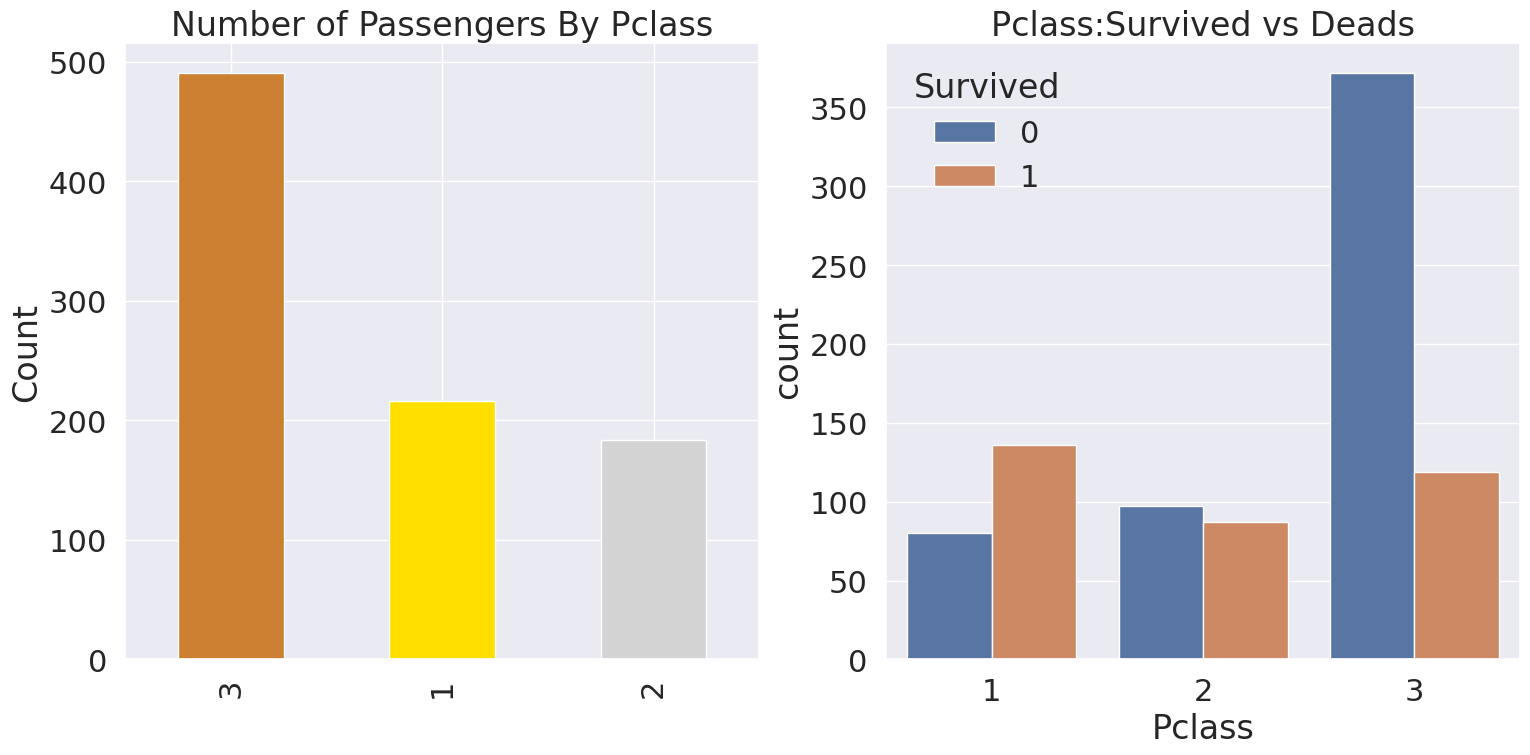

In [784]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x= 'Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Deads')
plt.show()

- People say Money Can't Buy Everything. 
- But we can clearly see that Passengers Of Pclass 1 were given a very high priprity while rescue. Even though the the number of Passenger in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- For Pclass 1% survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistc world.

- Lets Dive in little bit more and check the other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [785]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'], margins = True).style.background_gradient(cmap='summer_r')

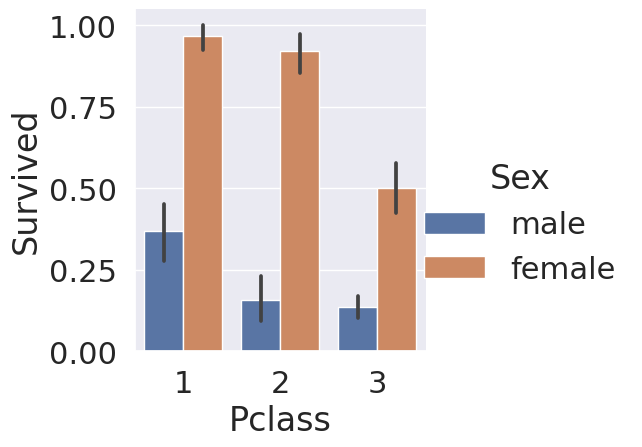

In [786]:
sns.catplot(x= 'Pclass', y= 'Survived', hue ='Sex', data=data, kind = 'bar')

- We use catPlot in this case, because they make the seperation of categorical values easy.

- Looking at the CrossTab and the catPlot, we can easily infer that survival for Women from Pclass1 is about 95-86% as only 3 out of 94 Women from Pclass1 died.

- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

- Looks like Pclass is also an important feature. Lets analyse other features

In [787]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

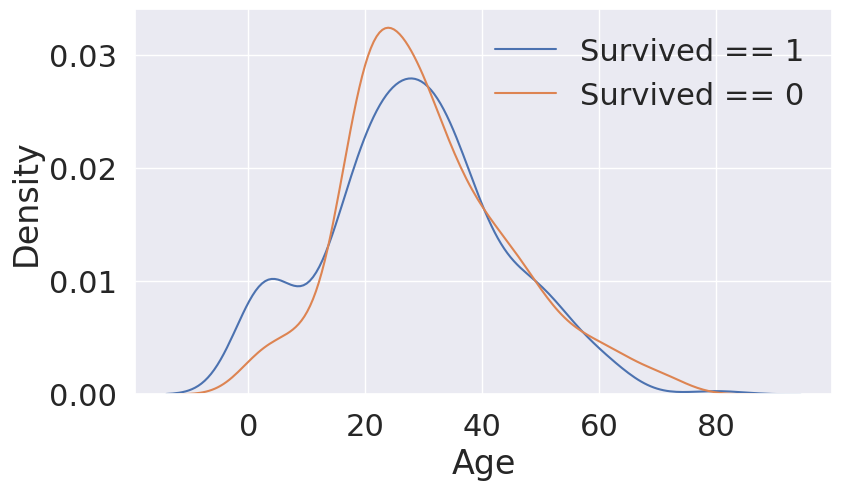

In [788]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(data[data['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(data[data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

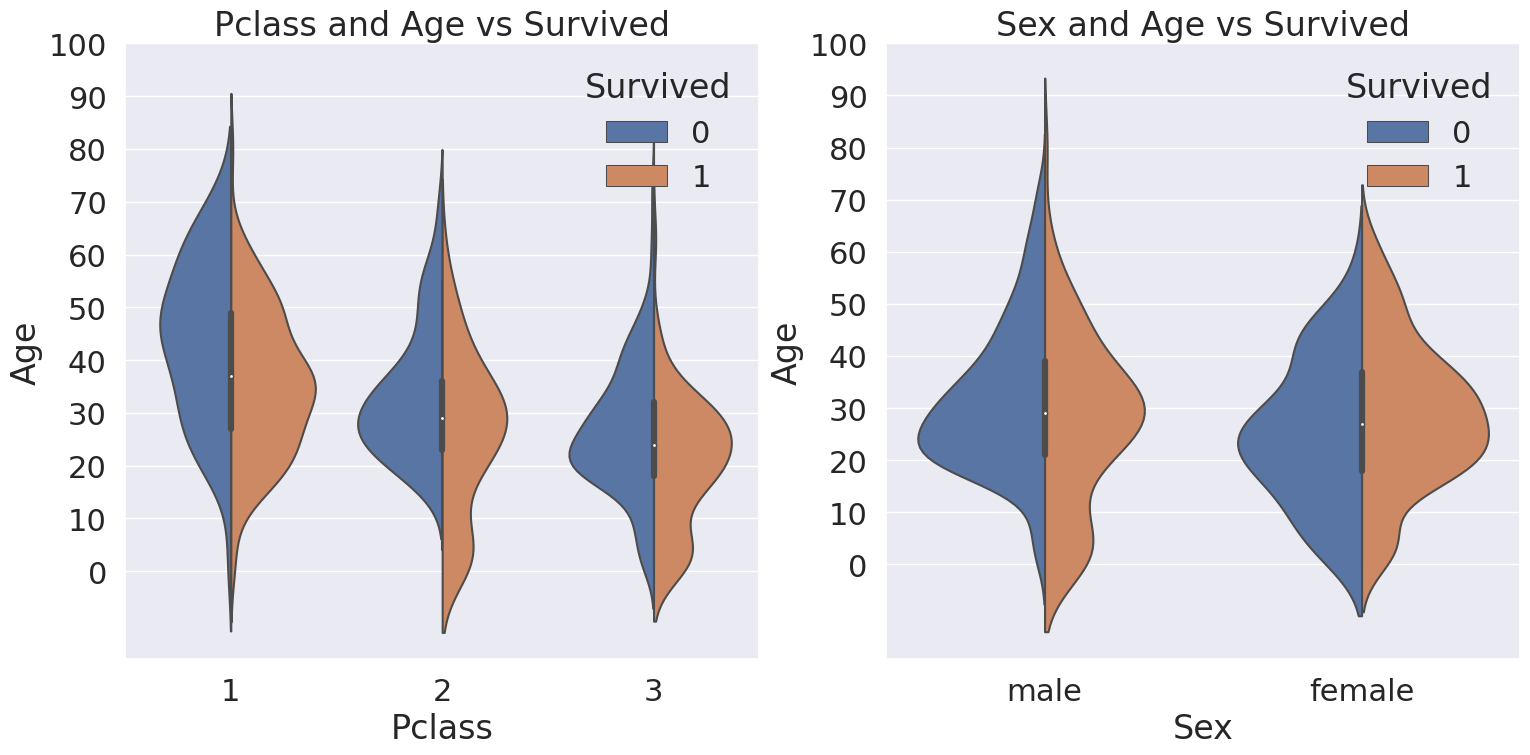

In [789]:
f, ax=plt.subplots(1,2, figsize = (18,8))
sns.violinplot(x= 'Pclass', y= 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x= 'Sex',y= 'Age', hue = 'Survived', data=data, split =True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations:
1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these Nan values, we can ssign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!, we can check the Name feature. Looking upon the feature, we can see that the names have as salutation like Mr or Mrs. Thus we can assign the mean values of Mr and MRs to the respective groups

- What's in A name?

In [790]:
data['Initial'] = 0
for i in data:
        data['Initial'] = data.Name.str.extract('([A-za-z]+)\.')
        # lets extract the Salutations

In [791]:
data['Initial'].tail(50)

841        Mr
842      Miss
843        Mr
844        Mr
845        Mr
846        Mr
847        Mr
848       Rev
849       Mrs
850    Master
851        Mr
852      Miss
853      Miss
854       Mrs
855       Mrs
856       Mrs
857        Mr
858       Mrs
859        Mr
860        Mr
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, dtype: object

- okat so here we are using the Regex: [A-za-z] +)..So what it does is it, it looks for strings which between A-Z or a-z and followed by a.(dot). So we successfilly extract the Initials from the Name.

In [792]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')
# checking the Initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- okay so there are some missspeeled initials like mile or Mme that stand for Miss. I will repelce them with Miss and same thing other values

In [793]:
data['Initial'].replace(['Mile', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer','Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Other', 'Other','Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [794]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.831081
Mlle      24.000000
Mr        32.739609
Mrs       36.009174
Other     44.600000
Name: Age, dtype: float64

In [795]:
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Master'), 'Age'] = 25
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data['Initial'] == 'other'), 'Age'] = 45

In [796]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

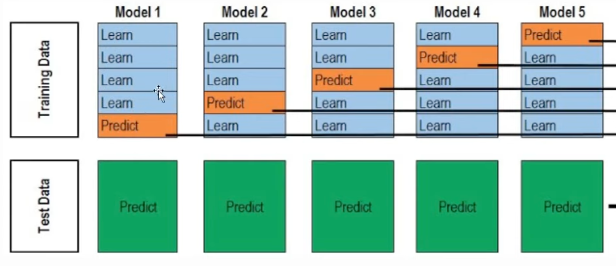

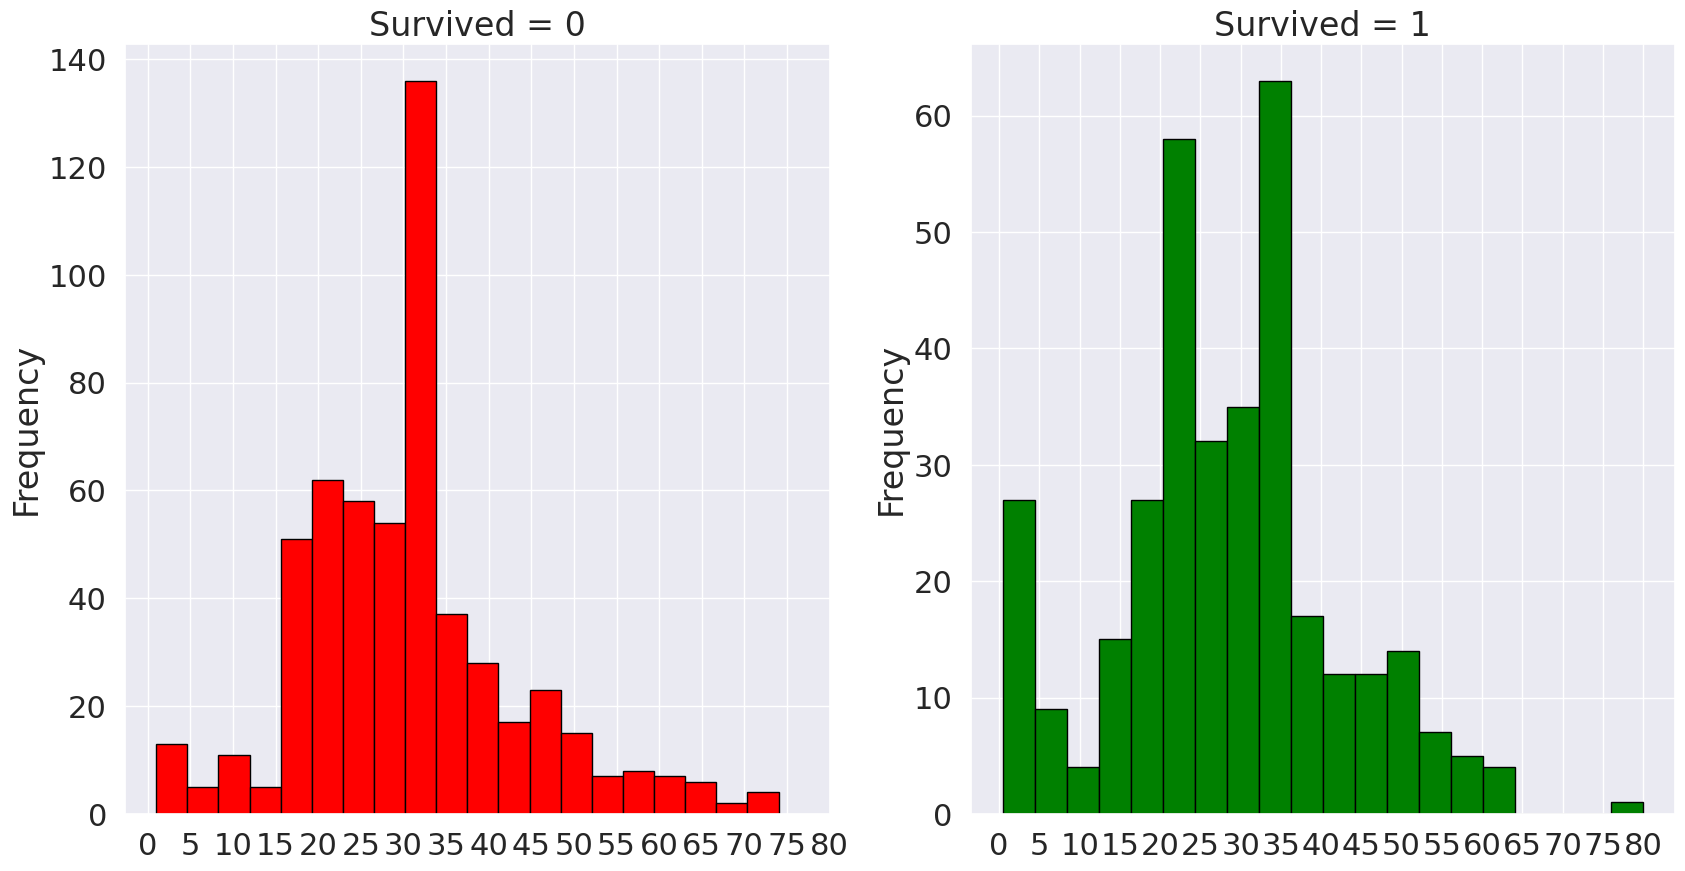

In [797]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data.loc[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data.loc[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()


Observations:
- The toddlers(age <5) were saved in large numbers(The Women and Child First Policy).

- The oldes Passenger was saved(80years).

- Maximum number of deaths were in the age group of 30-40

# Embarked

In [798]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

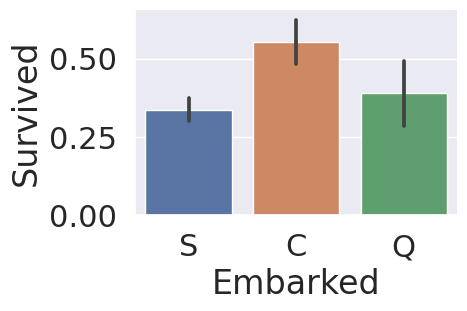

In [799]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Embarked', y='Survived', data=data, kind='bar')
plt.gcf().set_size_inches(5, 3)
plt.show()


- The chances for survival for Part C is highest around 0.55 while it is lowest for S.

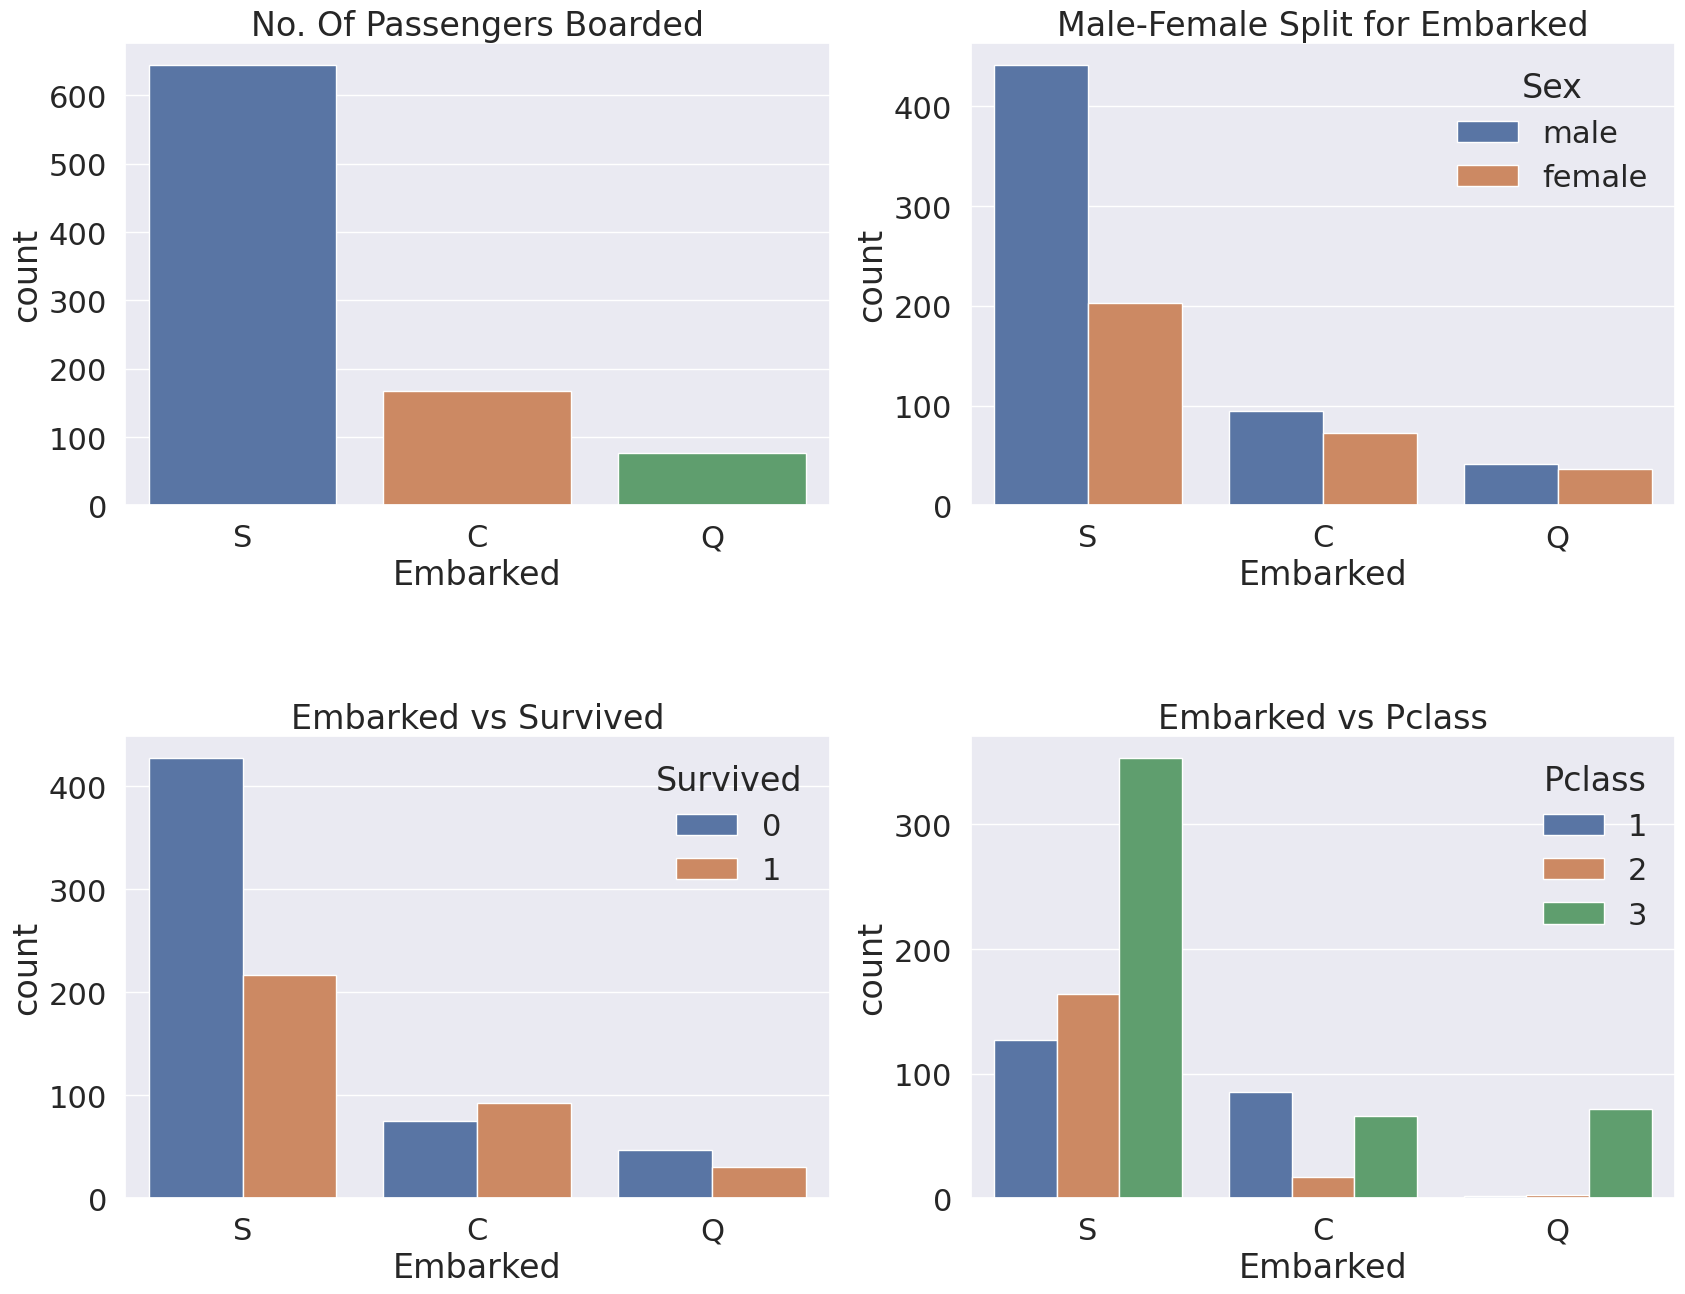

In [800]:
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# Observation

- Maximum passengers boarded from S. Majority of them being from Pclass3.
- The Passengers from C look to be lucky as a good promotion of them survived.
- The reason for this maybe the rescue of all the pclass1 and Pclass2 Passengers
- The Embark S looks to the port from where majority of the rich people boarded.
- Still the chances for survival is a low here. that is because many passengers from Pclass3 around 81% didn't survive.

- Port Q had almost 95% of the passengers were from Pclass3.

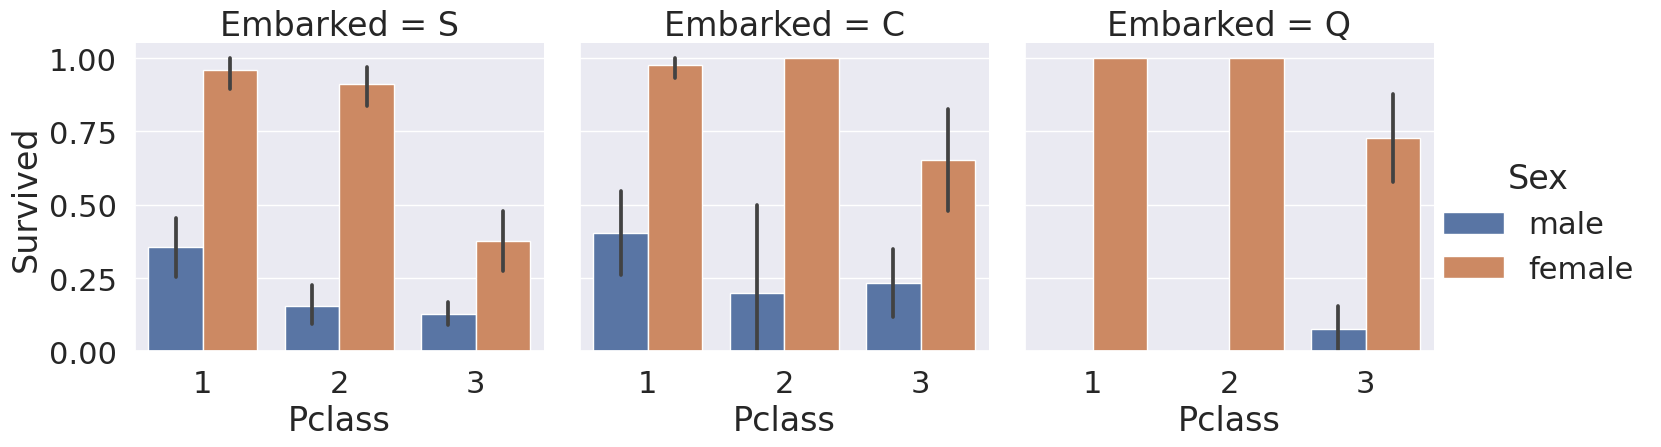

In [801]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='bar')
plt.show()


# Observations:
- The survival chances are almost 1 for woman for Pclass1 and Pclass2 irrespective of the Pclass

- Port S looks so be very unlucky for Pclass3 Passenegers as the Survival rate for both men and women is very low.(Money matters)

- port Q looks to be unlukies for Men, as almost all were from Pclass 3.

# Filling Embarked NaN
- As we saw that maximum passengers boarded from Port S. we place NaN with S.

In [802]:
data['Embarked'].fillna('S', inplace = True)

In [803]:
data['Embarked'].isnull().sum()

0

# sibsip
- This feature represents whether a person is alone or with his family members.
- sibling = brother, sister, stepbrother, stepsister
- Spouse - husband.wife

In [804]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


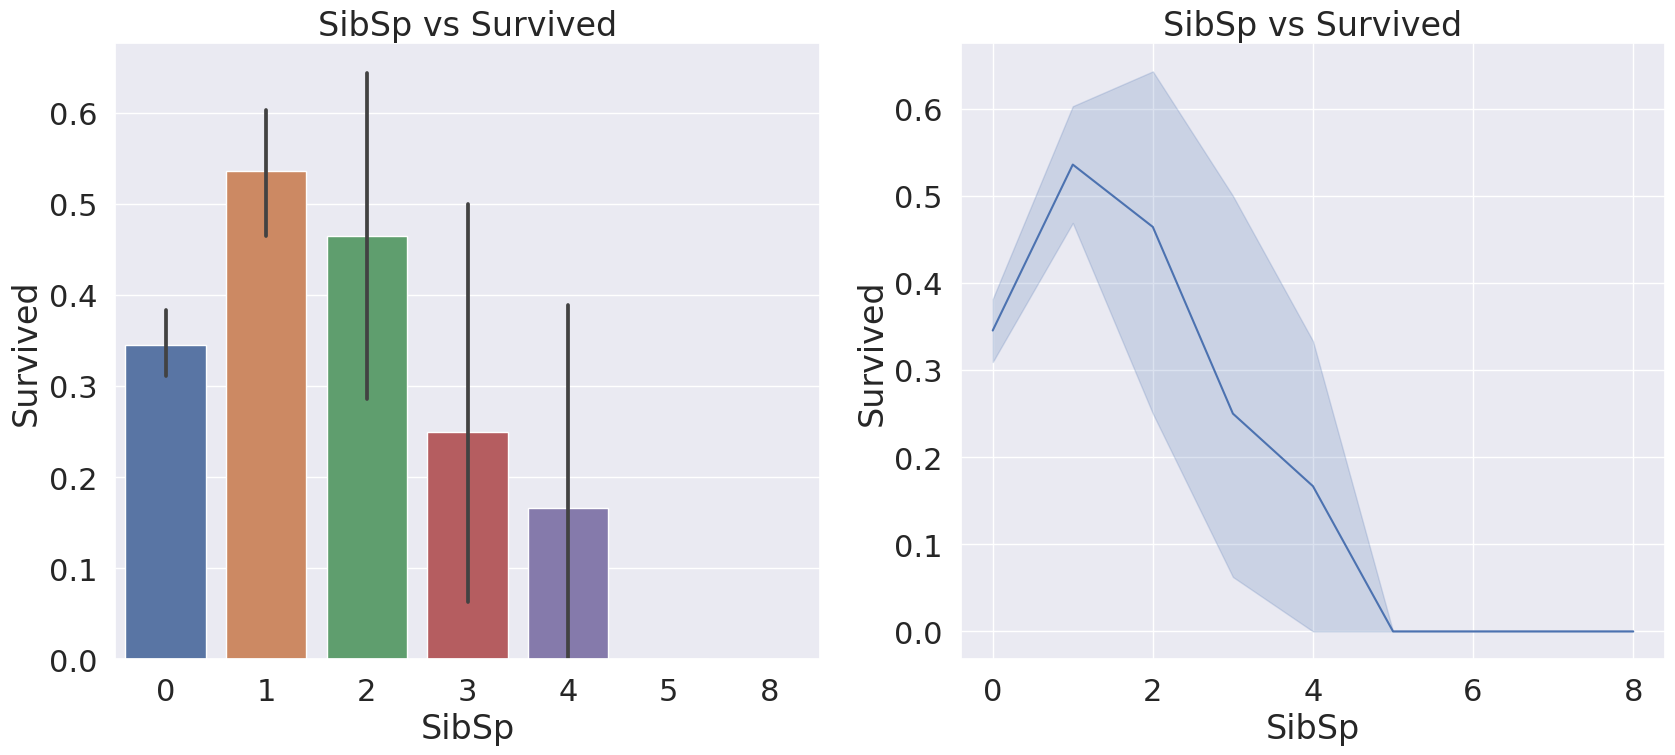

In [805]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar Plot
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# Line Plot
sns.lineplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()


In [806]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Observations:
- The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense.

- That is, if I have a family on board. I will try to save them instead of saving myself first.

- Suprisingly the survival for families with 5-8 members is 0%. The reson may be Pclass??

- the reason is Pclass. The crosstab shows person with SibSp > 3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died

# Parch

In [807]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


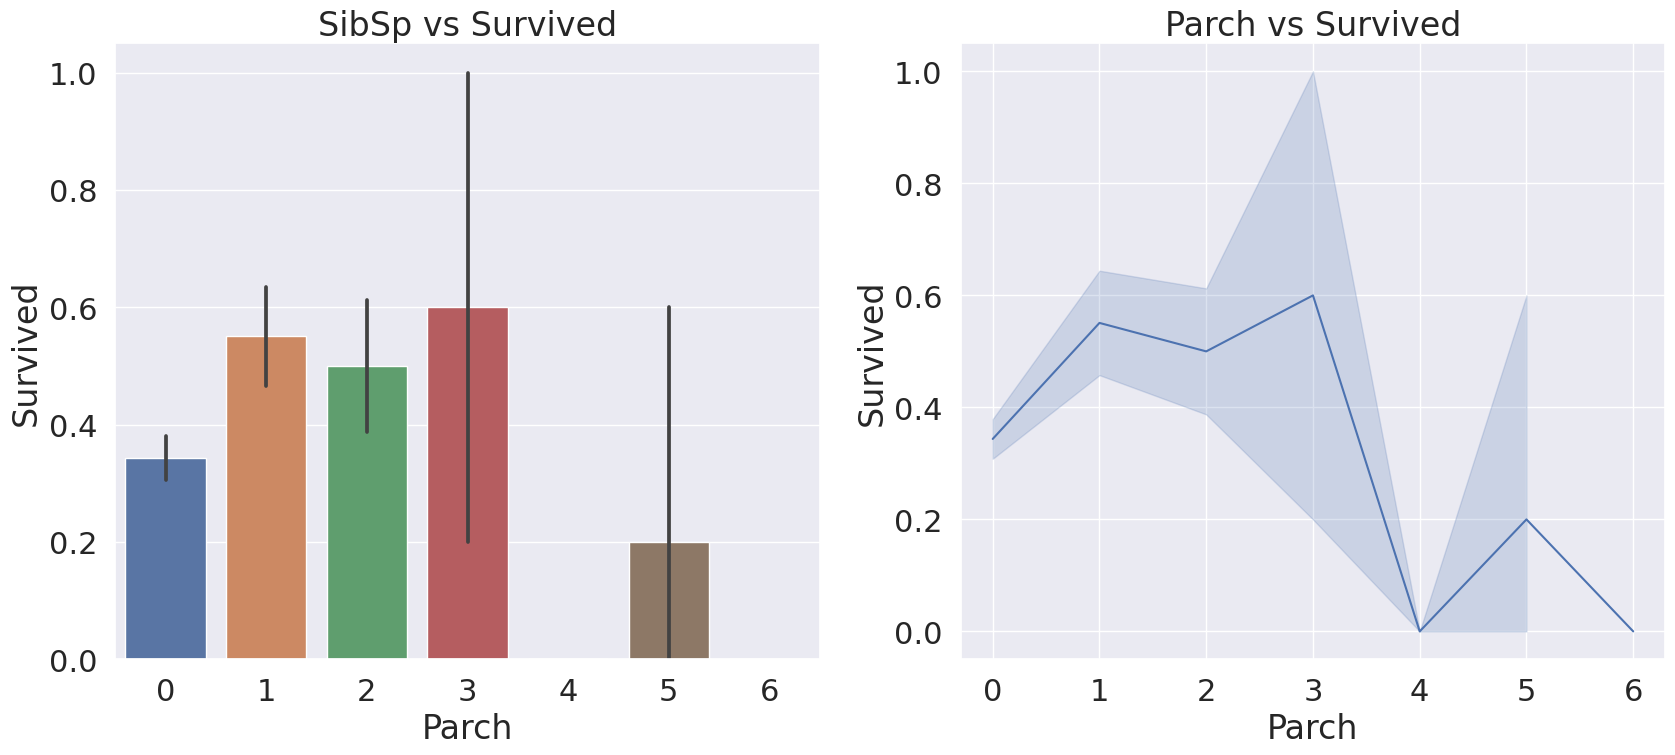

In [808]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar Plot
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

# Line Plot
sns.lineplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()


- 퍼스트 클래스 여성, S and C
- Sibsp > 3 생존률 낮다.

In [809]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '-' + data['Sex'].astype(str)

<Axes: xlabel='new_cat_pclass_sex'>

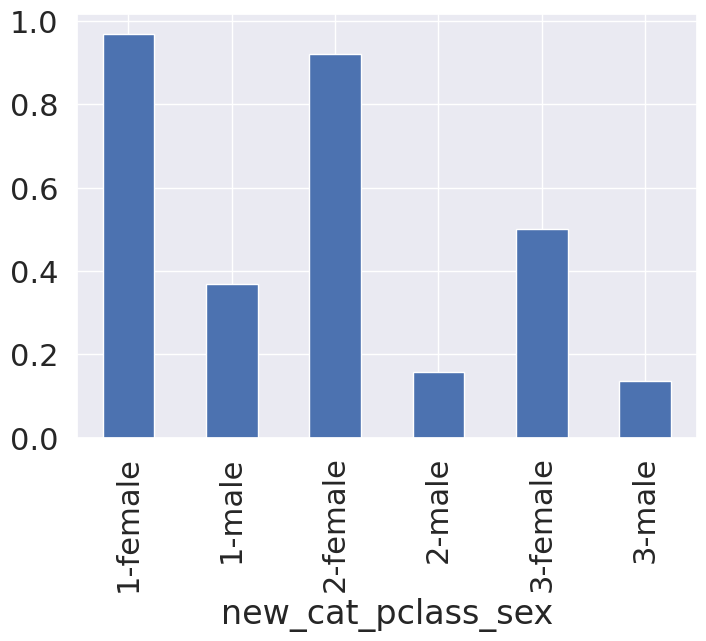

In [810]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

In [811]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '-' + data['Sex'].astype(str)+ '-' + data['Embarked'].astype(str)

<Axes: xlabel='new_cat_pclass_sex_embarked'>

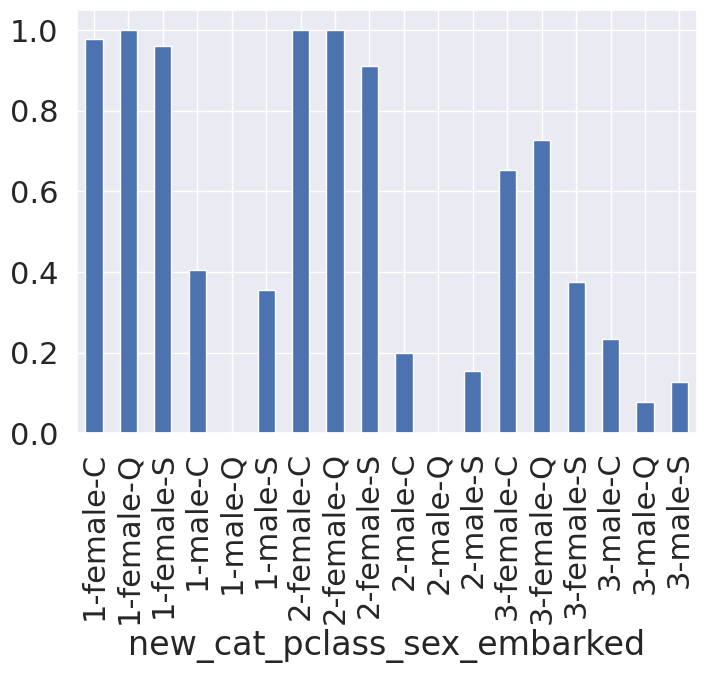

In [812]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

# Fare -> Continous Feature

In [813]:
print("Highest Fare was:" ,data['Fare'].max())
print("Lowest Fare was:" ,data['Fare'].min())
print("Averager Fare was:" ,data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Averager Fare was: 32.204207968574636


- The lowest fate is 0.0 Wow!! a free luxufrious ride.

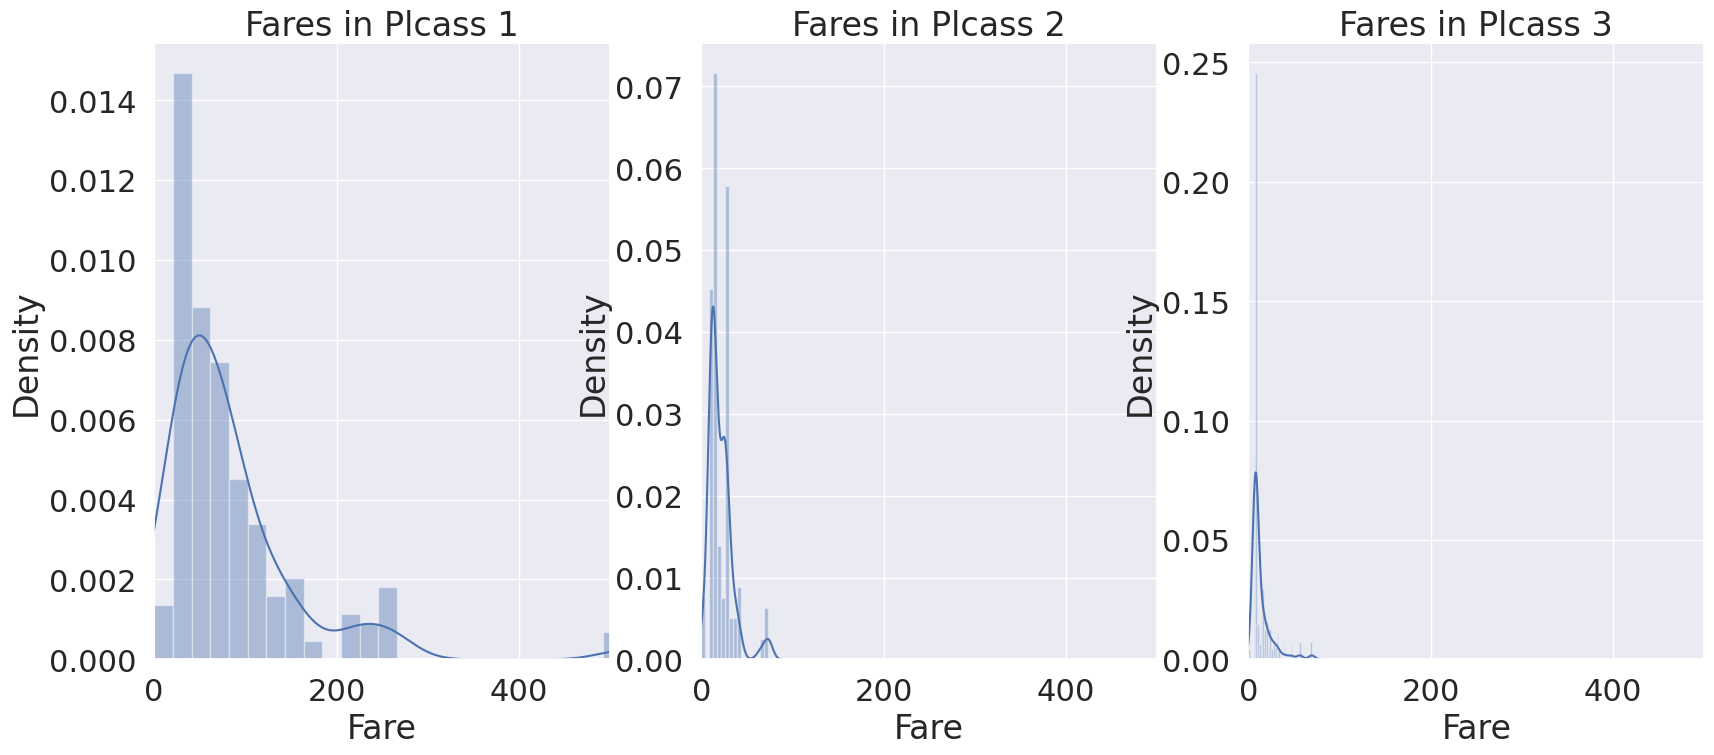

In [814]:
f, ax = plt.subplots(1,3, figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])

ax[0].set_title('Fares in Plcass 1')
ax[0].set_xlim([0, 500])

sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Plcass 2')
ax[1].set_xlim([0, 500])


sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Plcass 3')
ax[2].set_xlim([0, 500])


plt.show()




- There looks to be a large distribution in the fares of Passengers in Pclass1 
- and this distribution goes on decreasing as the standards reduces.
- As this is also continous. We cam covert into discrete values by using binning

# Observations in a Nutshell for all features

**Sex:** The chance of survival for women is high as compared to men.

**Pclass:** There is a visible trend that being a 1st class passenger gives you better chances of survival. The sruvival reate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is  high too for those from Pclass2. Money wins!!

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is av very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass passengers got up at S. Passengers at Q were all from Pclass3.**

**Parch+SibSp:** Hvaing 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probably rather than being alone or having a large family traveling with you


In [815]:
# Correation Between The Features

<Axes: >

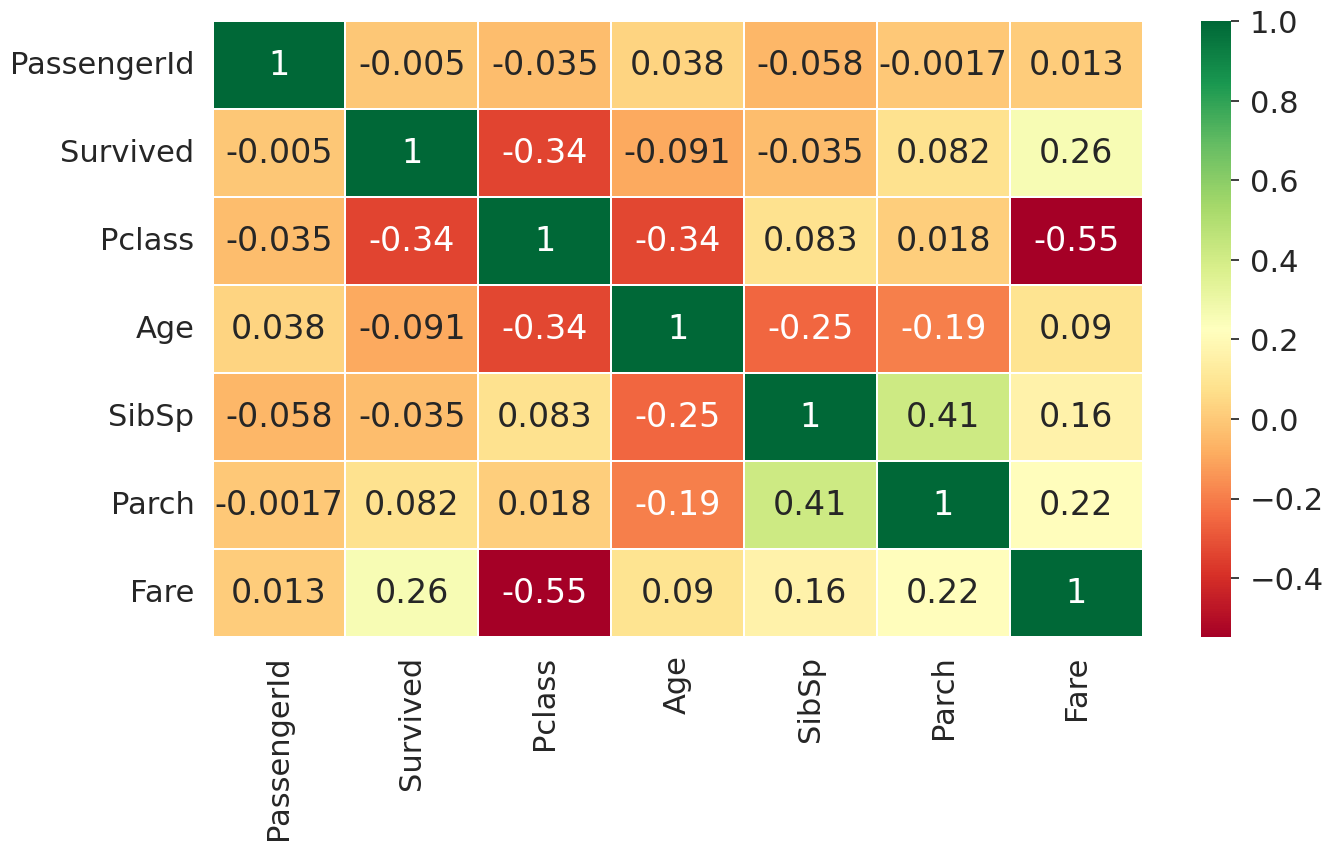

In [816]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.2)

# Interpreting The Heatmap

- The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot let us see what exactly correlation is.

**- Positive correlation: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**- Negaive CorRelaion: if an increase in feature A leads o decrease in feature B. then they are negatively correlated. A value - 1 means perfect negative correlation.**
**  
- Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. this means that both the fetures are containing highly similar information and there is very little or no variance in information. This is know as MultiClinearity as both of them contains alomost the same information.

- So do you think we should use both of them as one of them is redundant. while making or training models. we should try to eliminate redundant. features as it reduces training time and many such advantages.

- Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features/

- Eda done!

# Part2. Feature Enginerring and Date Cleaning
- Now what is Feature Enginerring?

- Whenever we are given a dataset with features, it is not necessary that all the feature will be important. There maybe be many redundant features which should be eliminated. Also, we can get or add new features by observing or extracting information from other features.

- An example wouldbe getting the initials feature using the Names Feature. 

- Lets see if we get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modeling


# Age_band

- Problem with age Feature. As i have mentioned earlier that age is a continous feature, there is a problem with Continous Variable in Machine Learning Models.

- Eg: If I say group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

- Now if I say to group them by their Age, them how would you do it? If there are 30 persons, there may be 30 age values. Now this is problematic

- we need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group & range of ages into a single bin or assign them a single value.

- Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into S bins. So 50/5 = 16. So bins of size 16.

In [817]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3-male,3-male-S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1-female,1-female-C,2


In [818]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')
# checking the number of passengers in each band

,Age_band
1,386
2,325
0,100
3,69
4,11


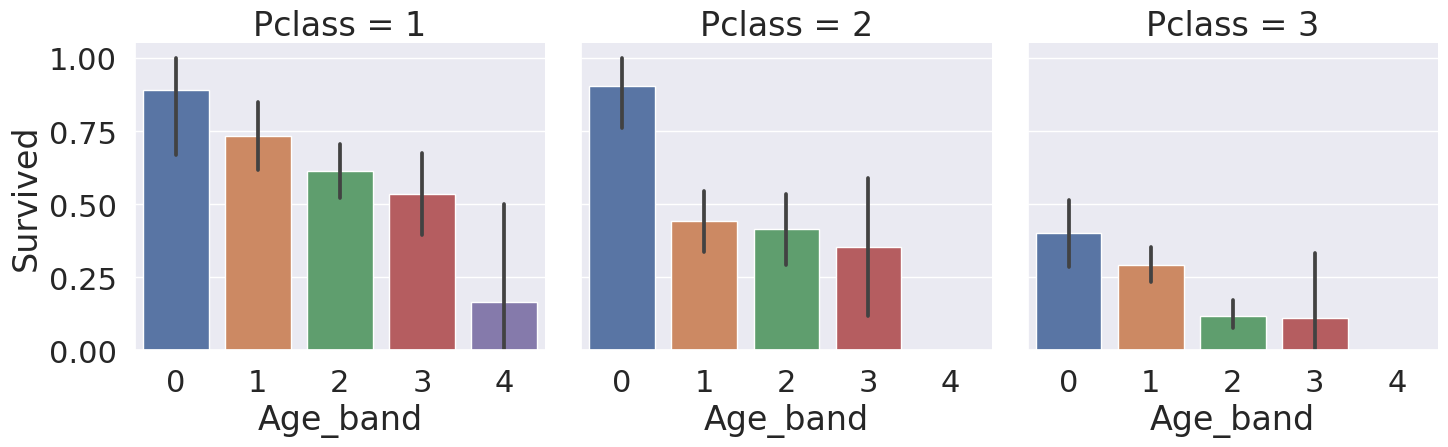

In [819]:
sns.catplot(x= 'Age_band', y= 'Survived', data=data, col = 'Pclass', kind = 'bar')
plt.show()



- True that_the survival rate decreases as the age increases irrespective of the Pclass.

# Family size and Alone

- At this point, we can create a new feature called "Family_size " and 'Alone' and analyse it. 

- This feature is the summation of Parch and sibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. 
- Alone will denote whether a passenger is alone or not.

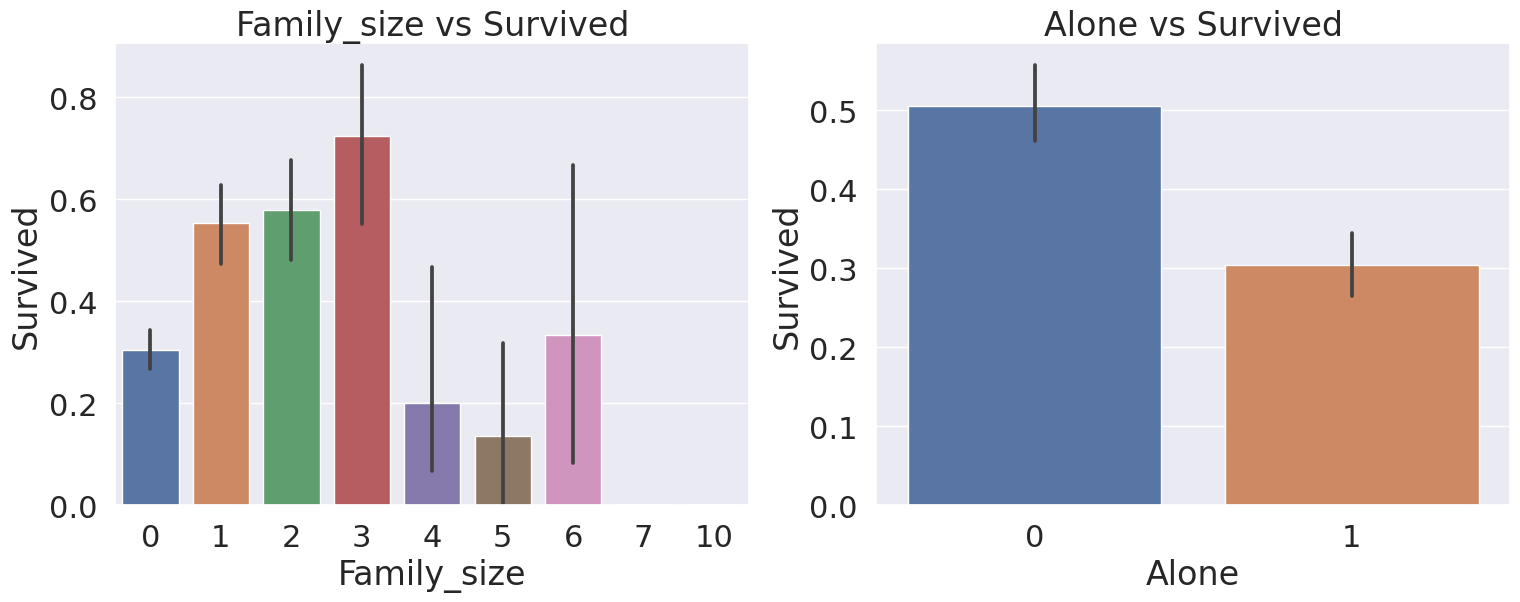

In [820]:
data['Family_size'] = 0
data['Family_size'] = data['Parch'] + data['SibSp']  # Family size
data['Alone'] = 0
data.loc[data.Family_size == 0, 'Alone'] = 1  # Alone

f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(x='Family_size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.barplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()


- Family_Size = 0 means that the passenger is alone. Clearly, 
- if you are alone or family_size = 0, then chances for survival is very low. 

- For family size > 4, the chances decrease too. 
- This also looks to be an important feature for the model.
- Lets examine this further.

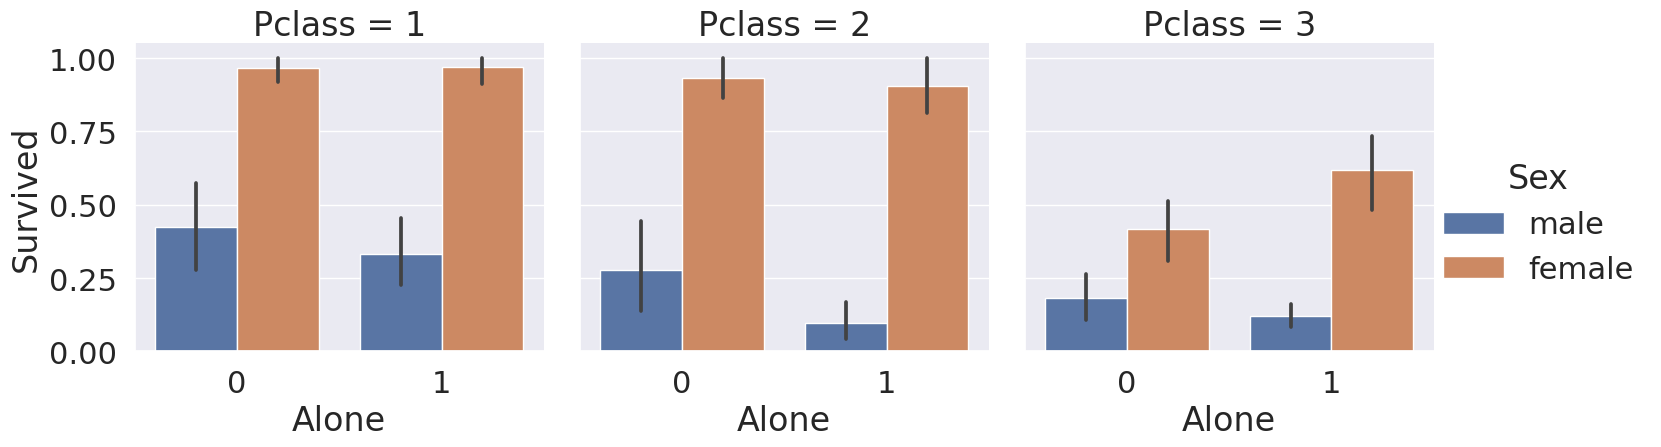

In [821]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='bar')
plt.show()


- It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family

# Fare_range
- Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut

- So what qcut is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 separate bins of value ranges

In [822]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [823]:
data.groupby(['Fare_Range'])['Survived'].value_counts()

Fare_Range       Survived
(-0.001, 7.91]   0           179
                 1            44
(7.91, 14.454]   0           156
                 1            68
(14.454, 31.0]   0           121
                 1           101
(31.0, 512.329]  1           129
                 0            93
Name: Survived, dtype: int64

- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

- Now we cannot pass the Fare_Range values as it its. We should convert it into singleton values sames as we did in Age_band



In [824]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.545) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

print(data['Fare_cat'].value_counts())

0    240
3    222
1    217
2    212
Name: Fare_cat, dtype: int64


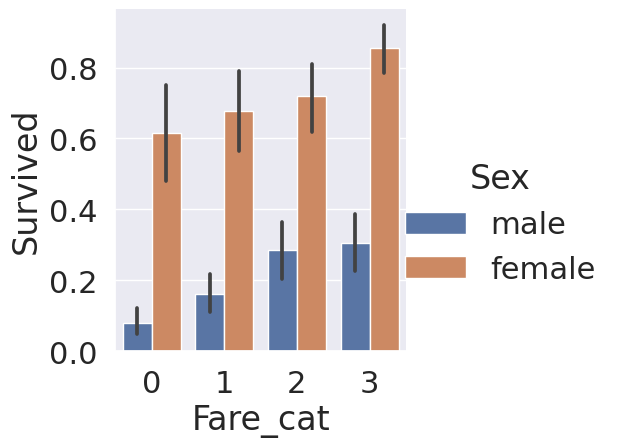

In [825]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='bar')
plt.show()


- Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the sex.

# Converting Stirng Values into Numeric
- since we cannot pass strings to a mchine learning moel, 
- we nedd to convert features look Sex, Embarked, etc into numeric values.

In [826]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


 # Converting Stirng Values into Numeric

# type 1

In [827]:
# from sklearn.preprocessing import LabelEncoder

In [828]:
# cat_cols =[ col for col in data.columns if data[col].dtype =='object']

In [829]:
cat_cols

['Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked',
 'Initial',
 'new_cat_pclass_sex',
 'new_cat_pclass_sex_embarked']

In [830]:
# for col in ['Sex', 'Embarked', 'Initial']:
#         encoder = LabelEncoder()
#         data[col] = encoder.fit_transform(data[col])

In [831]:
# indexer = {}
# for col in ['Sex', 'Embarked', 'Initial']:
#     _, indexer[col] = pd.factorize(data[col])

In [832]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

# Dropping unNeeded features

**name**-> We don't need name feature as it connot be converted into any categorical value

**Age** -> We have the Age_band feature, so no need of this. 

**Ticket** -> It is any random stirng that cannot be categorised.

**Fare** -> We have the Fare_cat feature, so unneeded

**Cabin** -> A lot of NaN values and also many passengers have multiple cabnins. So this is unless feature

**Fare_range** -> 쓴다
**Passenger Id** -> 안쓴다


- Now the above correlation plot, we can see some postively related features.
- some of them being SibSp andd Family_size and Parch and Family_size and some negative ones like Alone and Famimly_size

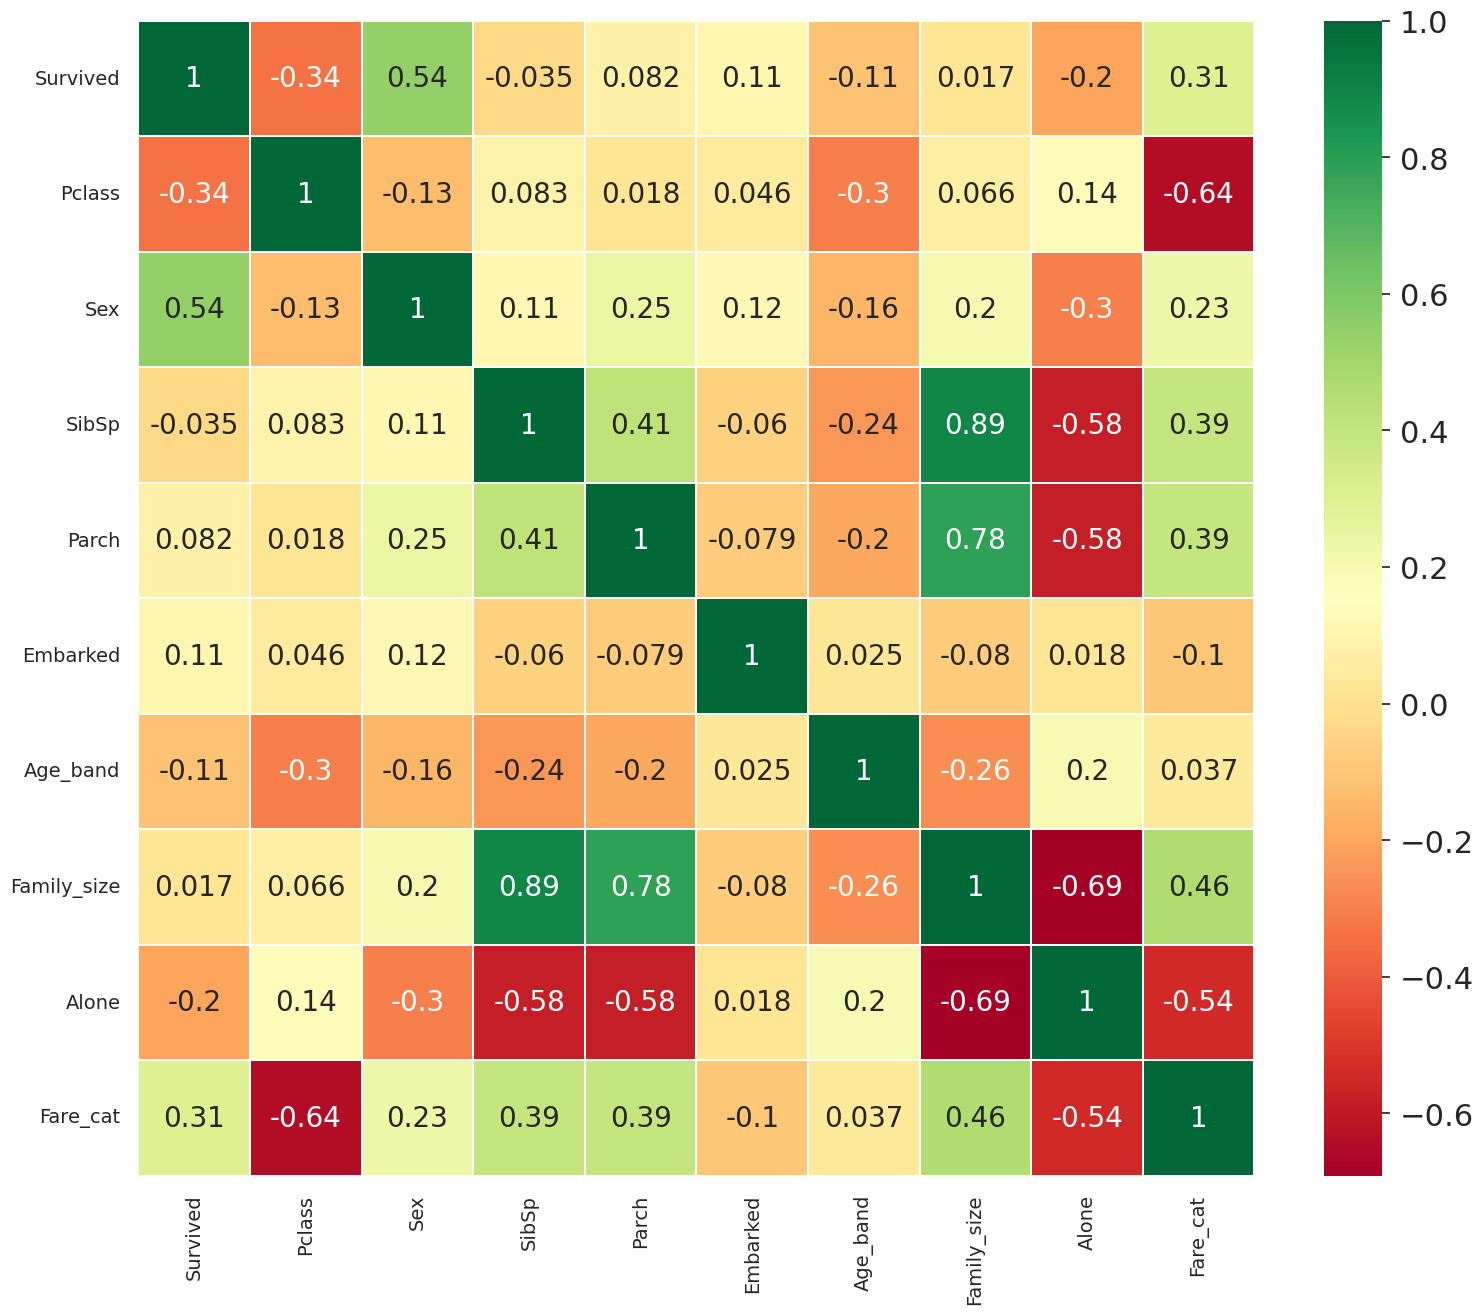

In [833]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()